In [1]:
import numpy as np
import matplotlib.pyplot as plt

from configurations import load_data , make_params_dict, create_fig, set_font_sizes, apply_general_styles , save_fig
from configurations.plot_config import FONTSIZES
apply_general_styles()

In [71]:
# Parameters
d = 500                  # Input dimension
tch_act = 'tanh'        # Activation function for teacher
std_act = 'tanh'        # Activation function for student
n_test = 8000           # Number of test samples
bs = 30              # Batch size for training
eps = 0.0               # Noise level for labels
q = 2.0                 # q-norm for SAM
lr = 0.01                # Learning rate


configs = [
    ('SGD', 0.0001,0.0),
    ('SGD', 0.00001,0.0),
    ('SGD', 0.0,0.0),
    ('SAM', 0.0,0.1),
    ('SAM', 0.0,0.01)]

summary = {}
for i , (opt,gamma,rho) in enumerate(configs):
    fix_names = ['d','tch_act','std_act','n_test']
    var_names = ['bs','opt','lr','q','rho','gamma']
    params = make_params_dict(fix_names, var_names)
    summary[i] = load_data('first_tests',experiment_name='compare_optimizers', params=params)

for key in summary[i].keys():
    print(f"{key}: {summary[i][key].shape}")

File first_tests_bs30_gamma0.0001_lr0.01_optSGD_q2_rho0.pkl loaded with pickle.load from /u/c/cerazova/SAM/data/compare_optimizers/d500_n_test8000_std_acttanh_tch_acttanh
File first_tests_bs30_gamma1e-05_lr0.01_optSGD_q2_rho0.pkl loaded with pickle.load from /u/c/cerazova/SAM/data/compare_optimizers/d500_n_test8000_std_acttanh_tch_acttanh
File first_tests_bs30_gamma0_lr0.01_optSGD_q2_rho0.pkl loaded with pickle.load from /u/c/cerazova/SAM/data/compare_optimizers/d500_n_test8000_std_acttanh_tch_acttanh
File first_tests_bs30_gamma0_lr0.01_optSAM_q2_rho0.1.pkl loaded with pickle.load from /u/c/cerazova/SAM/data/compare_optimizers/d500_n_test8000_std_acttanh_tch_acttanh
File first_tests_bs30_gamma0_lr0.01_optSAM_q2_rho0.01.pkl loaded with pickle.load from /u/c/cerazova/SAM/data/compare_optimizers/d500_n_test8000_std_acttanh_tch_acttanh
step: (706,)
train_loss: (706,)
test_loss: (706,)
overlap: (706,)
norm_student: (706,)
difference: (706,)


In [47]:
def convert_number(num):
    if num == 0.0:
        return r'$0$'
    else: # put scientific notation as num = r'$a 10^{n}$' for example num=0.00326 return r'3.2 10^{-3}'
        n = int(np.floor(np.log10(abs(num))))
        a = num / (10**n)
        if a == 1.0:
            return r'$10^{{{}}}$'.format(n)
        else:
            return r'${:.1f} \times 10^{{{}}}$'.format(a, n)

Figure saved on /u/c/cerazova/SAM/plots/2026-01 as learning_curves_bs30_d500_lr0.01_n_test8000_q2_std_acttanh_tch_acttanh.png


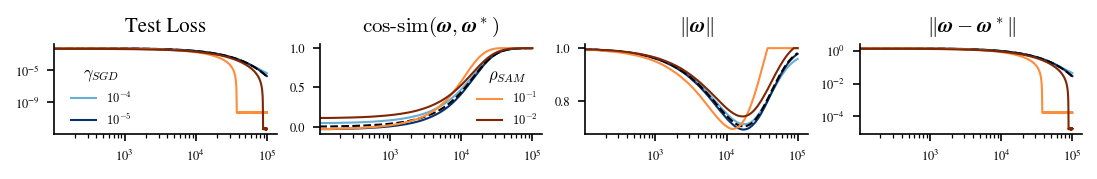

In [72]:
# Parameters
set_font_sizes(conf='tight')

steps = summary[0]['step']

plot_config = {
    0: {'key': 'test_loss', 'title': 'Test Loss'},
    1: {'key': 'overlap', 'title': r'$\text{cos-sim}(\boldsymbol{\omega}, \boldsymbol{\omega}^*)$'},
    2: {'key': 'norm_student', 'title': r'$\|\boldsymbol{\omega}\|$'},
    3: {'key': 'difference', 'title': r'$\|\boldsymbol{\omega} - \boldsymbol{\omega}^*\|$'}
}

alphas = [0.5,1.0,.0]

plot_setting = {}
for i , (opt,gamma,rho) in enumerate(configs):
    label = convert_number(gamma) if opt =='SGD' else convert_number(rho)
    cmap = 'Blues' if opt == 'SGD' else 'Oranges'
    color = plt.get_cmap(cmap)(alphas[i%3])
    linestyle = '-' 

    if gamma == 0.0 and rho == 0.0:
        label = None
        color = 'k'
        linestyle = '--'

    plot_setting[i] = {'label': label
                        , 'color': color
                        , 'linestyle': linestyle}

w_ratios = [1 ,1 ,1 ,1]

fig , axes = create_fig(ncols=len(plot_config),size='double',h=0.15,w_ratios=w_ratios)


for i , config in plot_config.items():
    ax = axes[i]
    if i in [0,3]:
        ax.set_yscale('log')
    ax.set_title(config['title'])

    for j , (opt,gamma,rho) in enumerate(configs):
        variable = summary[j][config['key']]
        settings = plot_setting[j]
        color = settings['color']
        label = settings['label']
        linestyle = settings['linestyle']
        ax.plot(steps, variable, label=label ,color=color,linestyle=linestyle,linewidth=1.)
ax.set_xscale('log')

# ax.set_xlim(0,3000)


# Personalized Legend
handles , labels = ax.get_legend_handles_labels()

handles_sdg , labels_sgd = handles[:2] , labels[:2]
fig.legend(handles_sdg, labels_sgd,title=r'$\gamma_{SGD}$', loc=(0.06,0.26), ncol=1, frameon=False,fontsize=FONTSIZES['xs'])

handles_sam , labels_sam = handles[2:] , labels[2:]
fig.legend(handles_sam, labels_sam,title=r'$\rho_{SAM}$', loc=(0.43,0.26), ncol=1, frameon=False,fontsize=FONTSIZES['xs'])



names = ['d','tch_act','std_act','n_test','bs','lr','q']
params = make_params_dict(names)
save_fig(fig,'learning_curves',params=params,date=True)
